# Importing Libraries

* System Append to set proper path

In [1]:
sys.path.append('../')

* Default

In [39]:
import lasio
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

* Pandas Options

In [3]:
pd.set_option('max_columns', None)

* Source Code

In [4]:
from source.utils import welllog

* Tqdm Progress Bar

In [5]:
%%capture
from tqdm import tqdm_notebook

# Reading Miscellaneous Data

In [6]:
file_path = '../data/Lithology code data.xlsx'

file_path2 = '../data/NPD stratigraphic picks north sea.xlsx'

litho_code = pd.read_excel(file_path)

picks = pd.read_excel(file_path2)

* Lithology Code 

In [7]:
litho_code.head(n=2)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,Lithology,Color,Lithology Attribute,Abbreviation
1,Aeolian Sandstone,LightYellow,CrossBedded Sand,35


        * Fixing Columns IDs

In [8]:
litho_code.columns = litho_code.iloc[0]

        * Droping first row (as it has become the columns ids now)

In [9]:
litho_code.drop(index=0, inplace=True)

        * Checking Final Result

In [10]:
litho_code.head(n=2)

,Lithology,Color,Lithology Attribute,Abbreviation
1,Aeolian Sandstone,LightYellow,CrossBedded Sand,35
2,Anhydrite,Light Magenta,Anhydrite,22


* Stratigraphic Picks

In [11]:
picks.head(n=2)

,Unnamed: 0,Well identifier,Surface,X,Y,Z,MD,Geological age,TVT,TST,Interpreter,Observation number
0,21675,10/4-1,CROMER KNOLL GP. Top,628531.41,6394710.62,-1350.9,1382.0,4.21,NaN,NaN,NPD,1
1,21660,10/4-1,Roedby Fm. Top,628531.41,6394710.62,-1350.9,1382.0,98.90,NaN,NaN,NPD,1


        * Renaming Unidentified Column

In [12]:
picks.rename(columns={'Unnamed: 0': 'Unidentified Column'}, inplace=True)

        * Checking Result

In [13]:
picks.head(n=2)

,Unidentified Column,Well identifier,Surface,X,Y,Z,MD,Geological age,TVT,TST,Interpreter,Observation number
0,21675,10/4-1,CROMER KNOLL GP. Top,628531.41,6394710.62,-1350.9,1382.0,4.21,NaN,NaN,NPD,1
1,21660,10/4-1,Roedby Fm. Top,628531.41,6394710.62,-1350.9,1382.0,98.90,NaN,NaN,NPD,1


# Reading Las files Dataset

In [14]:
path = '..//data/GEOLINK_Lithology and wells NORTH SEA/'

npd_wells = welllog.read_las_directory(path)

* Las files Glance

In [15]:
print('Number of Las Files read: ' + str(len(npd_wells)))
print('##########################')
print('Las files ID: ' + str(npd_wells.keys()))
print('##########################')
print(str(npd_wells['15_9-12'].curves))


Number of Las Files read: 223
##########################
Las files ID: dict_keys(['15_9-12', '15_9-13', '15_9-14', '15_9-15', '15_9-17', '15_9-18', '15_9-19 A', '15_9-19 B', '15_9-2', '15_9-22', '15_9-23', '15_9-4', '15_9-5', '15_9-7', '15_9-8', '15_9-9', '16_1-2', '16_1-6 A', '16_10-1', '16_10-2', '16_10-3', '16_10-4', '16_10-5', '16_11-1 S', '16_11-2', '16_2-11 A', '16_2-16', '16_2-6', '16_2-7', '16_4-1', '16_4-2', '16_5-3', '16_6-1', '16_7-1', '16_7-2', '16_7-3', '16_7-4', '16_7-5', '16_7-6', '16_7-7 S', '16_7-8 S', '16_8-1', '16_9-1', '17_11-1', '17_4-1', '24_12-2', '25_10-10', '25_10-2 R', '25_10-3', '25_10-4 R', '25_10-8 A', '25_10-8', '25_10-9', '25_11-1', '25_11-15', '25_11-19 S', '25_11-23', '25_11-24', '25_11-5', '25_2-13 T4', '25_2-14', '25_2-5', '25_2-6', '25_2-7', '25_3-1', '25_4-1', '25_4-5', '25_5-1', '25_5-2', '25_5-3', '25_5-4', '25_6-1', '25_6-2', '25_6-3', '25_7-2', '25_8-1', '25_8-5 S', '25_8-7', '25_8-9', '25_9-1', '26_4-1', '29_3-1', '29_6-1', '30_11-3', '30_2-1',

        Note: The Mnmonic Table above does not necessarily represent all the available log curves on the dataset

# Data Processing

* Checking unmatching unit of measurement for each log curve

In [16]:
unit_mismatch_list = welllog.unit_check(npd_wells)




It was found a total of 0 unmatching unit of measurement in the dataset. Please, check the flag output for proper adjustments


* Converting all las files to dataframe

In [17]:
npd_wells_df = {}

for id in tqdm_notebook(list(npd_wells.keys()), desc='Converting to dataframe'):

    npd_wells_df[id] = npd_wells[id].df()

        * Filling in Log Dataframes

In [18]:
#logs_dict = welllog.log_frame(npd_wells_df, logs_list, mode='df')

* Creating Main Dataframe

    * Creating Well ID column

In [19]:
for id in tqdm_notebook(list(npd_wells_df.keys()), desc='Adding Well Name Column'):

    npd_wells_df[id]['WELL_NAME'] = id

        * Converting Depth to a Column

In [20]:
for id in tqdm_notebook(list(npd_wells_df.keys()), desc='Adding Depth Column'):

    npd_wells_df[id]['DEPTH'] = npd_wells_df[id].index

        * Selected Logs

In [21]:
logs_list = ['DEPTH','LITHOLOGY_GEOLINK', 'CALI', 'NPHI', 'RHOB', 'GR', 'DTC', 'RDEP', 'WELL_NAME']


        * Creating Empty Dataframe

In [22]:
df_main = pd.DataFrame(columns= logs_list)

        * Filling Dataframe

In [25]:
for id in tqdm_notebook(list(npd_wells_df.keys()), desc='Adding Depth Column'):

    tmp = []

    for i in range(len(logs_list)):

        if logs_list[i] in npd_wells_df[id].columns:

            tmp.append(logs_list[i])

    df_main = df_main.append(npd_wells_df[id][tmp], ignore_index=True)     

## Exploratory Data Analysis

* Correlation Matrix

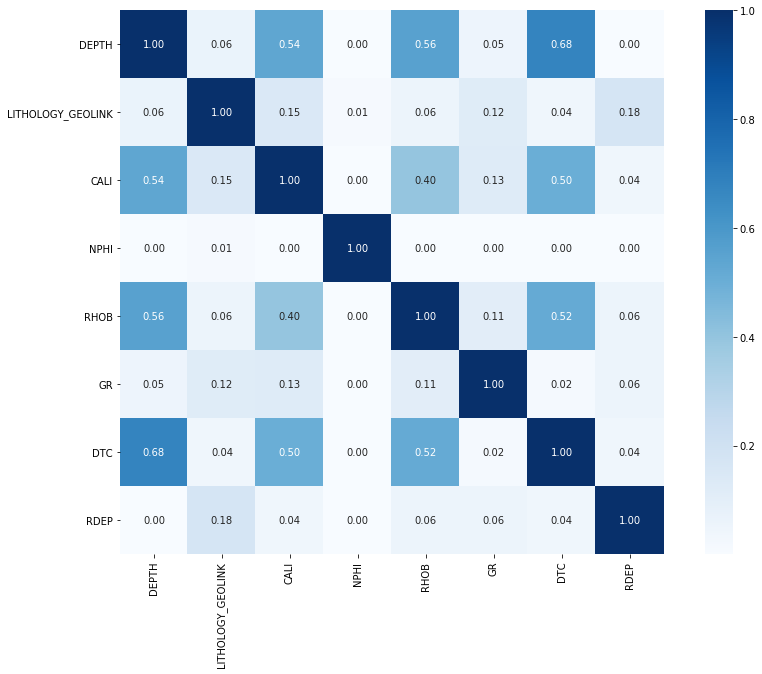

In [38]:
corrmat_df = abs(df_main.corr()) # absolute correlation

plt.figure(figsize=(15,10))

sns.heatmap(corrmat_df, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, cmap='Blues')

* Distribution Information

        * Lithology_Geoling Variable

In [52]:
(mu, sigma) = stats.norm.fit(df_main[df_main.LITHOLOGY_GEOLINK.notnull()].LITHOLOGY_GEOLINK.values) 

Text(0.5, 1.0, 'LITHOLOGY_GEOLINK distribution -- Mu: 7.425249099003604 Sigma: 4.628712679162475')

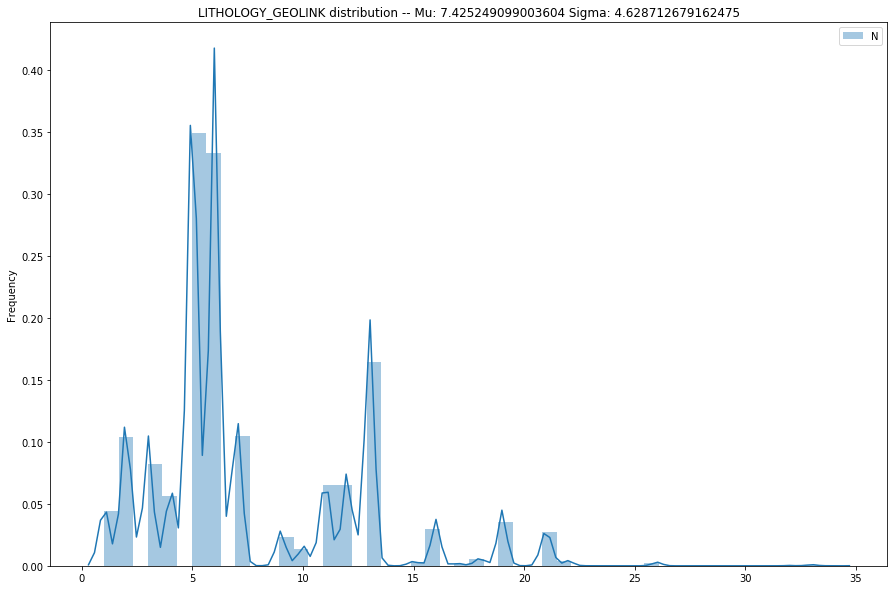

In [54]:
plt.figure(figsize=(15,10))

sns.distplot(df_main[df_main.LITHOLOGY_GEOLINK.notnull()].LITHOLOGY_GEOLINK.values); 

plt.legend('Normal distribution')
plt.ylabel('Frequency')
plt.title('LITHOLOGY_GEOLINK distribution -- Mu:' + ' ' + str(mu) + ' ' + 'Sigma:' + ' ' + str(sigma) )

In [58]:
litho_code.head()

,Lithology,Color,Lithology Attribute,Abbreviation
1,Aeolian Sandstone,LightYellow,CrossBedded Sand,35
2,Anhydrite,Light Magenta,Anhydrite,22
3,Argillaceous Limestone,Dodger Blue,Chalk,12
4,Arkose,LightGoldenrod,Gravel,36
5,Basement,Salmon,Intrusive,23


In [59]:
litho_code_dict = {}

for row_val in litho_code.index:

    litho_code_dict[litho_code['Abbreviation'][row_val]] = litho_code['Lithology Attribute'][row_val]

In [60]:
litho_code_dict

{35: 'CrossBedded Sand',
 22: 'Anhydrite',
 12: 'Chalk',
 36: 'Gravel',
 23: 'Intrusive',
 25: 'Sandy Shale',
 16: 'Sandy Limestone',
 31: 'Breccia',
 14: 'Calcareous Shale',
 33: 'Halite',
 9: 'Chalk',
 19: 'Extrusive',
 18: 'Coal',
 17: 'Conglomerate',
 3: 'CrossBedded Sand',
 15: 'Dolomite2',
 26: 'Gypsum',
 21: 'Halite',
 34: 'Halite',
 11: 'Limestone',
 13: 'Chalk',
 30: 'Shaly Sand',
 24: 'Intrusive',
 32: 'Halite',
 10: 'Calcareous Sandstone',
 1: 'Sand',
 4: 'Shaly Sandstone',
 8: 'Shale',
 6: 'Silt',
 5: 'Silt',
 2: 'Sand',
 7: 'Shale',
 29: 'Chert',
 27: 'Halite',
 28: 'Extrusive',
 20: 'Extrusive',
 '-999,25': nan}